In [16]:
import seaborn as sb
import pandas as pd
import numpy as np 
import pandas_datareader as pddr
import matplotlib.pyplot as plt
import datetime as dt

In [17]:
sb.set()

In [2]:
stock = "MSFT SPY".split()
from_start = dt.date.today()-dt.timedelta(365)

In [3]:
data_stock = pddr.get_data_yahoo(stock,from_start)['Close']
data_stock.head()

Symbols,MSFT,SPY
Date,,
2020-12-07,214.289993,369.089996
2020-12-08,216.009995,370.170013
2020-12-09,211.800003,366.850006
2020-12-10,210.520004,366.730011
2020-12-11,213.259995,366.299988


In [4]:
returns = (np.log(data_stock).diff()).dropna()
returns.head()

Symbols,MSFT,SPY
Date,,
2020-12-08,0.007994,0.002922
2020-12-09,-0.019682,-0.009009
2020-12-10,-0.006062,-0.000327
2020-12-11,0.012931,-0.001173
2020-12-14,0.004398,-0.004487


In [5]:
returns.dropna()

Symbols,MSFT,SPY
Date,,
2020-12-08,0.007994,0.002922
2020-12-09,-0.019682,-0.009009
2020-12-10,-0.006062,-0.000327
2020-12-11,0.012931,-0.001173
2020-12-14,0.004398,-0.004487
...,...,...
2021-11-29,0.020862,0.012192
2021-11-30,-0.018105,-0.019649
2021-12-01,-0.001544,-0.011169


In [6]:
returns.corr()

Symbols,MSFT,SPY
Symbols,,
MSFT,1.000000,0.677091
SPY,0.677091,1.000000


In [7]:
scatter_data = returns.sample(70).corr()
scatter_data

Symbols,MSFT,SPY
Symbols,,
MSFT,1.000000,0.782172
SPY,0.782172,1.000000


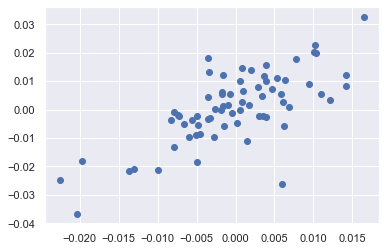

In [8]:
scatter_data = returns.sample(70)
plt.scatter(x=scatter_data['SPY'], y=scatter_data['MSFT'])

In [9]:
regg = np.polyfit(scatter_data['SPY'],scatter_data['MSFT'], deg=1)
regg

array([1.156511e+00, 9.601174e-04])

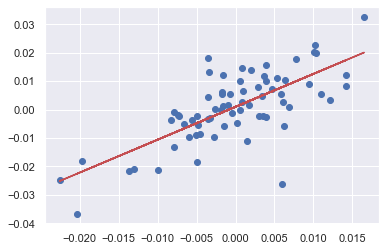

In [10]:
trend = np.polyval(regg,scatter_data['SPY'])
plt.scatter(scatter_data['SPY'], scatter_data['MSFT'])
plt.plot(scatter_data['SPY'], trend, 'r');

In [11]:
data_spy = pd.DataFrame(pddr.get_data_yahoo('SPY', from_start)['Close'])
time_spy = np.arange(1, len(data_spy) + 1)
data_spy['time'] = time_spy
data_spy = data_spy[['time', 'Close']]
data_spy = round(data_spy,2)
data_spy.tail()

,time,Close
Date,,
2021-11-29,247,464.60
2021-11-30,248,455.56
2021-12-01,249,450.50
2021-12-02,250,457.40
2021-12-03,251,453.42


In [12]:
regg_spy = np.polyfit(data_spy['time'], data_spy['Close'], deg=1)
regg_spy

array([  0.3941682 , 369.37492685])

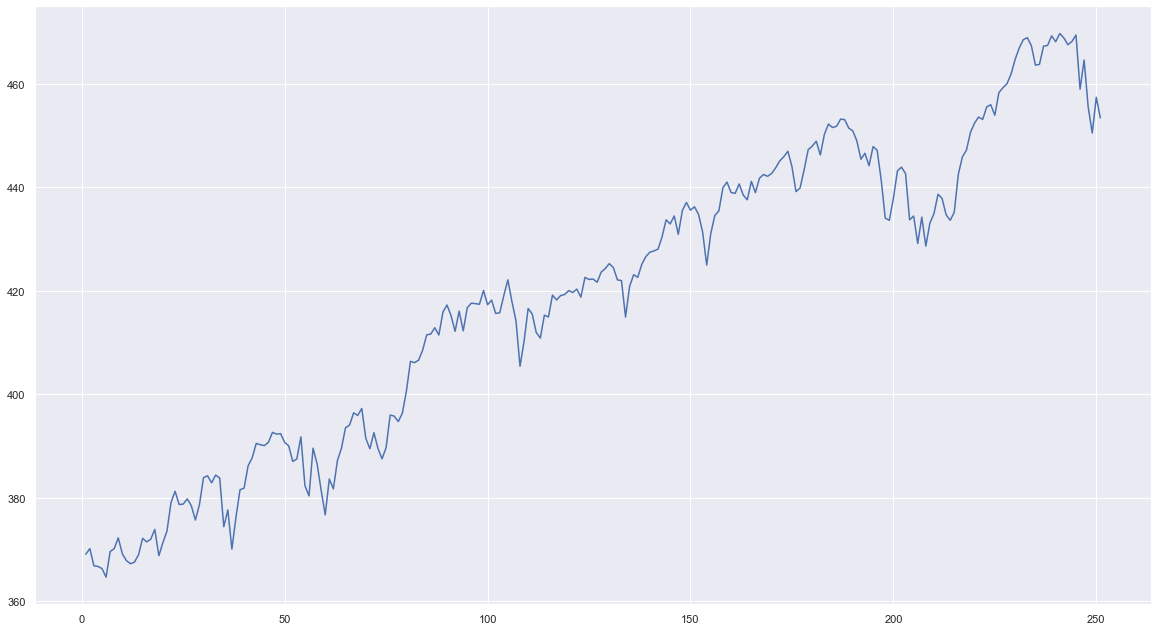

In [13]:
trend_spy = np.polyval(regg_spy, data_spy['time'][-70:])
std = data_spy['Close'][-70:].std()
plt.figure(figsize=(20,11))
plt.plot(data_spy['time'], data_spy['Close'], label = 'S&P')

In [18]:
predict_spy = np.poly1d(regg_spy)
predict_spy(254)

469.4936485828119

<AxesSubplot:xlabel='time', ylabel='Close'>

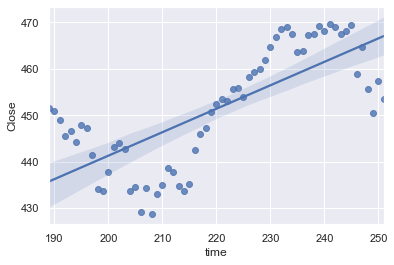

In [15]:
sb.regplot(x='time', y='Close', fit_reg=True, data=data_spy[-63:])